In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GM

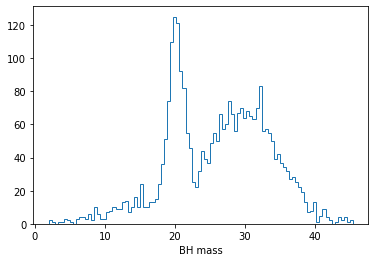

In [15]:
#loading data

data=np.load('formationchannels.npy')

#looking at the data

plt.hist(data,bins=100,histtype='step');
plt.xlabel('BH mass');

In [ ]:
#Note:

#in my version of sklearn: 0.24.2 the fit for only 1 component doesn't work in a for cycle.
#to see it uncomment the following lines:

########################################################
#N=np.arange(1,11)
#a=np.array([GM(i).fit(data) for i in N])
#f=np.array([a[i].aic(data) for i in range(len(a))])
########################################################

number of components:  4


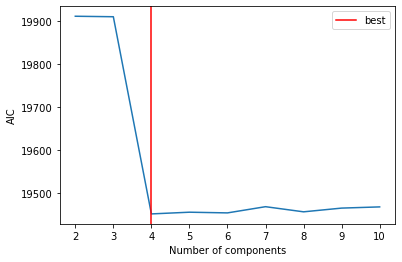

In [16]:
#fitting our data with different number of components

N=np.arange(2,11)
a=np.array([GM(i).fit(data) for i in N])

#computing the AIC and finding the number of components in which we have a minimum for the AIC:

f=np.array([a[i].aic(data) for i in range(len(a))])
best=int(N[np.where(f==np.min(f))])

#printing best number of components 

print('number of components: ', best)

#plotting the AIC against the number of components

plt.plot(N,f)
plt.axvline(best,color='red',label='best')
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.legend()
plt.show()

In [17]:
#best fit and relative means

true_f=GM(best).fit(data)
print('the means of the components are: \n',true_f.means_)

the means of the components are: 
 [[33.83554607]
 [20.17707928]
 [27.91327392]
 [13.69917825]]


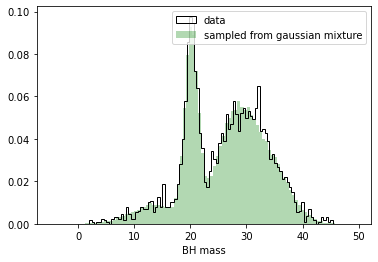

In [18]:
#sampling some point from the distribution and comparing with data

y=true_f.sample(100000)

#plotting the two distributions

plt.hist(data,100,color='black',density=True,histtype='step',label='data');
plt.hist(y[0],100,alpha=0.3,color='green',density=True,label='sampled from gaussian mixture');
plt.xlabel('BH mass');
plt.legend()
plt.show()

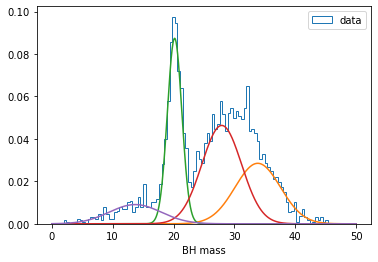

In [19]:
#construction of a grid

x_grid=np.linspace(0,50,1000)

#predict_proba gives the probability that this points belongs to a particular component
#these are the responsibilities

prob=true_f.predict_proba(x_grid.reshape(-1, 1))

#score_samples computes the log_likelyhood of finding each point given the best model found

likely=np.exp(true_f.score_samples(x_grid.reshape(-1, 1)))

#computation of the probabilities that a model gives the point

pdfs=prob*likely[:,np.newaxis]

#plotting and comparing with data

plt.hist(data,bins=100,density=True,histtype='step',label='data');
plt.plot(x_grid,pdfs)
plt.xlabel('BH mass');
plt.legend()
plt.show()